In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Loan.csv")

In [3]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# Data Preprocessing
df1 = df.drop(['Loan_ID'],axis=1)

In [8]:
df1.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
df1.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
corr_matrix = df1.corr(numeric_only=True)

In [11]:
# Fill missing values in categorical columns with mode
df1['Gender'].fillna(df1['Gender'].mode()[0], inplace=True)
df1['Married'].fillna(df1['Married'].mode()[0], inplace=True)
df1['Self_Employed'].fillna(df1['Self_Employed'].mode()[0], inplace=True)
df1['Loan_Status'].fillna(df1['Loan_Status'].mode()[0], inplace=True)
df1['Dependents'].fillna(df1['Dependents'].mode()[0], inplace=True)

In [12]:
corr_matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [13]:
import seaborn as sns
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<function matplotlib.pyplot.show(close=None, block=None)>

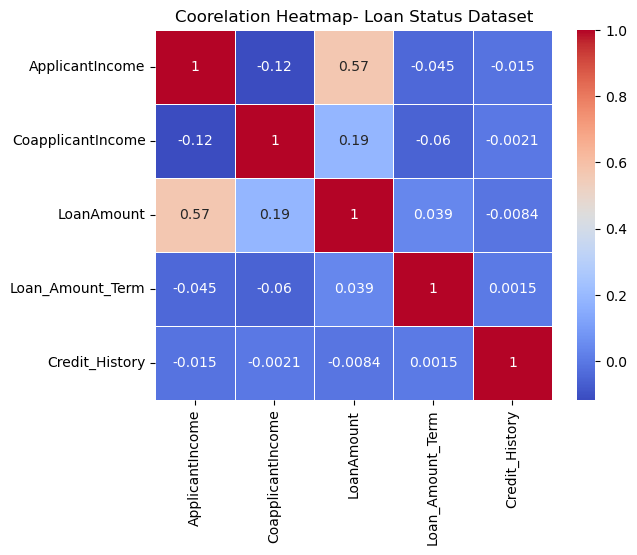

In [14]:
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',linewidth=0.5)
plt.title("Coorelation Heatmap- Loan Status Dataset")
plt.show

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Gender'] = le.fit_transform(df1['Gender'])

In [16]:
df1['Married'] = le.fit_transform(df1['Married'])

In [17]:
df1['Education'] = le.fit_transform(df1['Education'])

In [18]:
df1['Self_Employed'] = le.fit_transform(df1['Self_Employed'])

In [19]:
df1['Loan_Status'] = le.fit_transform(df1['Loan_Status'])

In [20]:
df1.Dependents.value_counts()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

In [21]:
df.Property_Area.value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [22]:
df1 = pd.get_dummies(df1, columns=['Dependents'],drop_first=True)

In [23]:
df1 = pd.get_dummies(df1, columns=['Property_Area'],drop_first=True)

In [24]:
df1.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,5849,0.0,NaN,360.0,1.0,1,False,False,False,False,True
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,True,False,False,False,False
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,1,False,False,False,False,True
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,1,False,False,False,False,True
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,1,False,False,False,False,True


In [25]:
df1.isnull().sum()

Gender                      0
Married                     0
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Loan_Status                 0
Dependents_1                0
Dependents_2                0
Dependents_3+               0
Property_Area_Semiurban     0
Property_Area_Urban         0
dtype: int64

In [26]:
median = df1.median(numeric_only=True)
median

Gender                        1.0
Married                       1.0
Education                     0.0
Self_Employed                 0.0
ApplicantIncome            3812.5
CoapplicantIncome          1188.5
LoanAmount                  128.0
Loan_Amount_Term            360.0
Credit_History                1.0
Loan_Status                   1.0
Dependents_1                  0.0
Dependents_2                  0.0
Dependents_3+                 0.0
Property_Area_Semiurban       0.0
Property_Area_Urban           0.0
dtype: float64

In [27]:
df1 = df1.fillna(median)

In [28]:
df1.isnull().sum()

Gender                     0
Married                    0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [29]:
df1.shape

(614, 15)

# Data Analysis

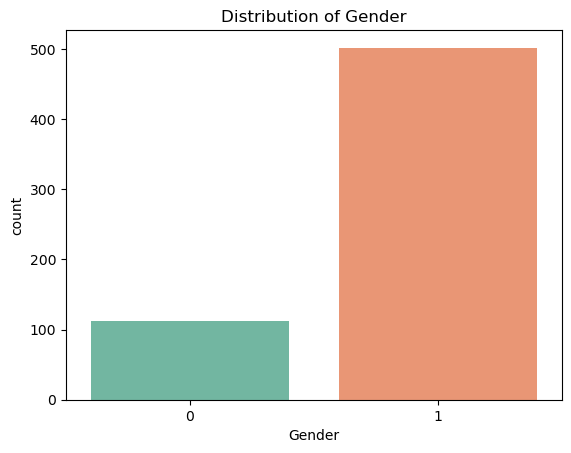

In [30]:
sns.countplot(data=df1, x='Gender', palette='Set2')
plt.title("Distribution of Gender")
plt.show()


In [31]:
df1.Gender.value_counts()

Gender
1    502
0    112
Name: count, dtype: int64

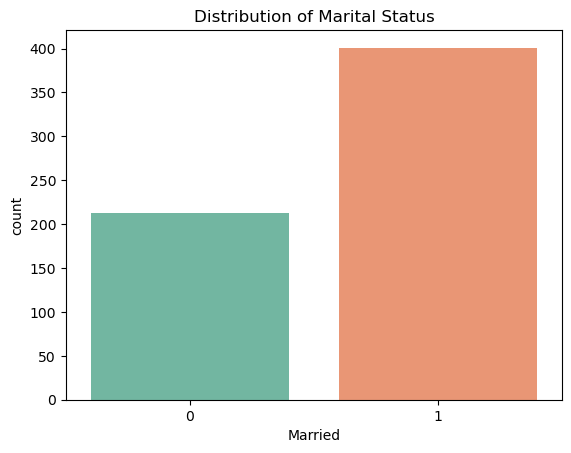

In [32]:
sns.countplot(data=df1, x='Married', palette='Set2')
plt.title("Distribution of Marital Status")
plt.show()


Text(0.5, 1.0, 'Loan_Status & Education')

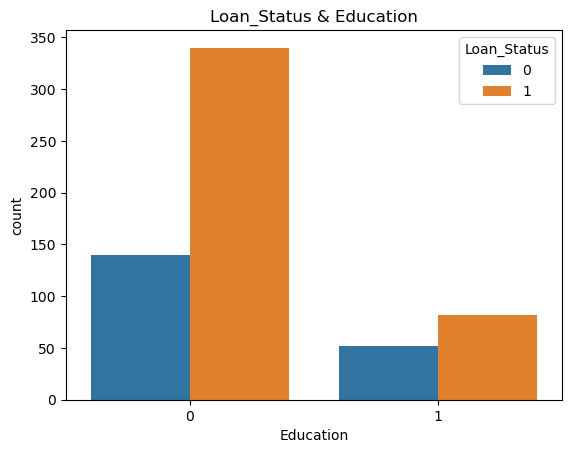

In [33]:
sns.countplot(data=df1,x='Education' , hue='Loan_Status')
plt.title('Loan_Status & Education')

Text(0.5, 1.0, 'Loan_Status & Self_Employed')

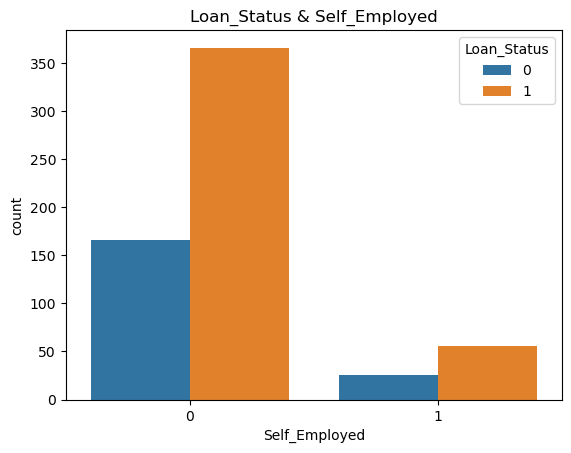

In [34]:
sns.countplot(data=df1,x='Self_Employed' , hue='Loan_Status')
plt.title('Loan_Status & Self_Employed')

In [39]:
print(df1['Loan_Status'].unique())


[1 0]


Text(0.5, 1.0, 'Loan_Status & Self_Employed')

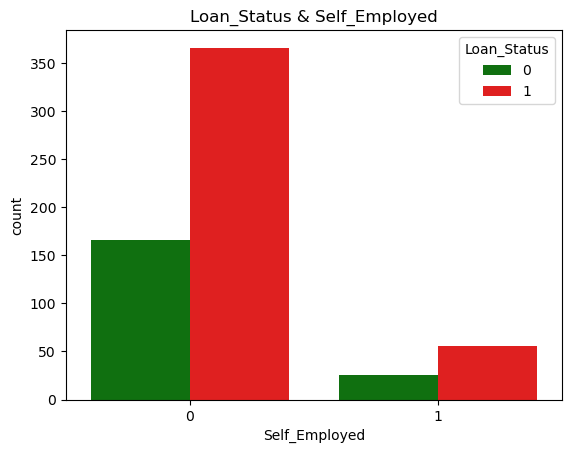

In [41]:
sns.countplot(data=df1, x='Self_Employed', hue='Loan_Status', palette={0: 'green', 1: 'red'})
plt.title('Loan_Status & Self_Employed')

Text(0.5, 1.0, 'Loan_Status & Married')

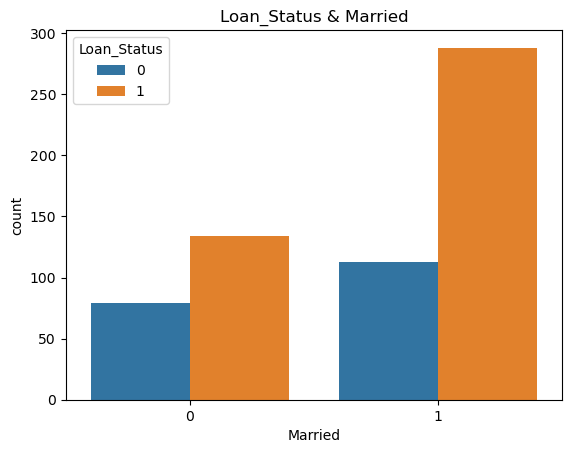

In [42]:
sns.countplot(data=df1,x='Married' , hue='Loan_Status')
plt.title('Loan_Status & Married')

# Data Modelling

In [45]:
x=df1.drop(['Loan_Status'],axis=1)
y=df1.Loan_Status

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [49]:
Lr = LogisticRegression(max_iter=10000)
Lr.fit(x_train , y_train)

LogisticRegression(max_iter=10000)

In [52]:
Lr.score(x_train,y_train)

0.8115942028985508

In [53]:
Lr.score(x_test,y_test)

0.8064516129032258

In [54]:
y_pred = Lr.predict(x_test)

In [109]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [64]:
# Evaluation Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


# Display results
print("Model Evaluation:")
print(f"MAE  = {mae:.2f}")
print(f"MSE  = {mse:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R²   = {r2:.2f}")

Model Evaluation:
MAE  = 0.19
MSE  = 0.19
RMSE = 0.44
R²   = 0.06


In [65]:
Svc = SVC()
Svc.fit(x_train , y_train)

SVC()

In [67]:
Svc.score(x_train,y_train)


0.6884057971014492

In [68]:
Svc.score(x_test,y_test)

0.7096774193548387

In [69]:
KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(x_train , y_train)

KNeighborsClassifier(n_neighbors=7)

In [70]:
KNN.score(x_train,y_train)

0.7155797101449275

In [71]:
KNN.score(x_test,y_test)

0.6451612903225806

In [107]:
DT = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)
DT.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [75]:
DT.score(x_train,y_train)

0.8188405797101449

In [76]:
DT.score(x_test,y_test)

0.7903225806451613

In [80]:
y1_pred = DT.predict(x_test)

In [81]:
r2 = r2_score(y_test, y1_pred)
print(f"R²   = {r2:.2f}")

R²   = -0.02


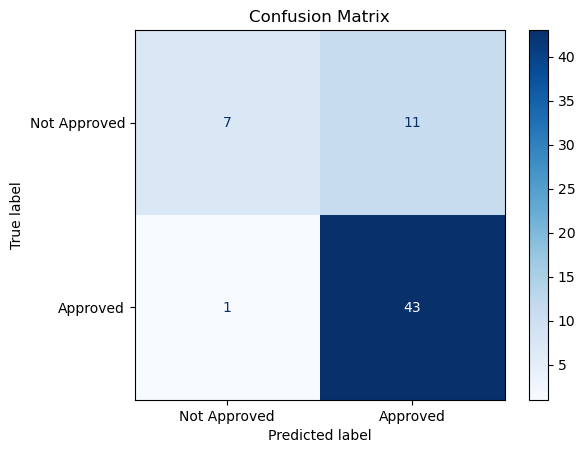

In [113]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# y_test = actual labels, y_pred = predicted labels
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Approved', 'Approved'])

# Plot the confusion matrix
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()


In [ ]:
# Accuracy = (TP + TN) / Total = (43 + 7) / 62 = 80.6%

# Precision = TP / (TP + FP) = 43 / (43 + 11)

# Recall = TP / (TP + FN) = 43 / (43 + 1)

In [90]:
print("Shape of full dataset:", df1.shape)
print("Length of x_test:", len(x_test))
print("Length of y_test:", len(y_test))


Shape of full dataset: (614, 15)
Length of x_test: 62
Length of y_test: 62


In [93]:
y_train_pred = Lr.predict(x_train)

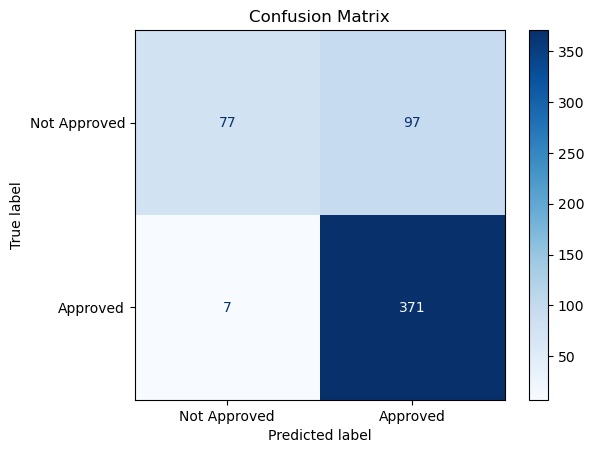

In [95]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# y_test = actual labels, y_pred = predicted labels
cm = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Approved', 'Approved'])

# Plot the confusion matrix
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()
